# <strong> Hello World! </strong> 


In [1]:
# Open and display the script:
f = open("Hello_world.py", "r")
print(f.read())
f.close()


from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

print("Hello world from rank %r!" % rank)



In [5]:
# Parallel run the script in terminal

# ! -- running the command in terminal
# mpirun -- command for running scripts with MPI
# -n <Number> -- specify the number of processes

!mpirun -n 10 python Hello_world.py

Hello world from rank 8!
Hello world from rank 9!
Hello world from rank 5!
Hello world from rank 3!
Hello world from rank 7!
Hello world from rank 1!
Hello world from rank 4!
Hello world from rank 0!
Hello world from rank 2!
Hello world from rank 6!


In [ ]:
# Use this when in Google colab
# !mpiexec --allow-run-as-root -n 10 python -m mpi4py Hello_world.py

# <strong> Blocking point-to-point communication
</strong> 


In [6]:
f = open("Simple_blocking_p2p.py", "r")
print(f.read())
f.close()


from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    data = { 'a': 7, 'b': 3.14 }
    comm.send(data, dest = 1, tag = 11)

    print("rank = %r, data = %r" % (rank, data))

elif rank == 1:
    data = comm.recv(source = 0, tag = 11)

    print("rank = %r, data = %r" % (rank, data))

else:
    print("rank = %r, data = <NONE>" % rank)



In [7]:
!mpirun -n 3 python Simple_blocking_p2p.py

rank = 2, data = <NONE>
rank = 0, data = {'a': 7, 'b': 3.14}
rank = 1, data = {'a': 7, 'b': 3.14}


# <strong> NumPy blocking point-to-point communication </strong> 


In [9]:
f = open("Numpy_blocking_p2p.py", "r")
print(f.read())
f.close()


from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

# In real code this section might read in data from file
if rank == 0:
    size = 10
    comm.send(size, dest = 1)

    data = np.linspace(0.0, 3.14, size)
    comm.Send(data, dest = 1)

    print("Sended data = %r" % data)

elif rank == 1:
    size = comm.recv(source = 0)

    # Allocate space to receive the array
    data = np.empty(size, dtype = 'd')
    comm.Recv(data, source = 0)

    print("Received data = %r" % data)

else:
    data = None

    print("Other data = %r" % data)



In [10]:
!mpirun -n 3 python Numpy_blocking_p2p.py

Other data = None
Sended data = array([0.        , 0.34888889, 0.69777778, 1.04666667, 1.39555556,
       1.74444444, 2.09333333, 2.44222222, 2.79111111, 3.14      ])
Received data = array([0.        , 0.34888889, 0.69777778, 1.04666667, 1.39555556,
       1.74444444, 2.09333333, 2.44222222, 2.79111111, 3.14      ])


# <strong> Non-blocking point-to-point communication
</strong> 


In [11]:
f = open("Nonblocking_p2p.py", "r")
print(f.read())
f.close()


from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

data = rank

print("rank = %r, data = %r" % (rank, data))

# All processes wait here for all
comm.Barrier()
print("Barrier")
# The same here
# Try to comment one of and both of barriers
comm.Barrier()

# Send, not wait
request = comm.isend(data, dest = (rank + 1) % size)

# Receive, not wait
request = comm.irecv(source = (rank - 1) % size)
# Wait for corresponding sender
data = request.wait()

print("rank = %r, data = %r" % (rank, data))



In [12]:
!mpirun -n 3 python Nonblocking_p2p.py

rank = 0, data = 0
rank = 1, data = 1
rank = 2, data = 2
Barrier
Barrier
Barrier
rank = 1, data = 0
rank = 0, data = 2
rank = 2, data = 1


# <strong> Collective communication: Sum-reduce </strong>

In [19]:
f = open("Sum_reduce.py", "r")
print(f.read())
f.close()


from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

# Python objects sum-reduce
result = comm.reduce(rank, op = MPI.SUM, root = 0)

if rank == 0:
    print("result = %r" % result)

# Numpy objects sum-reduce
sendbuf = np.empty(2, dtype = 'i')
sendbuf[0] = 1
sendbuf[1] = rank

if rank == 0:
    recvbuf = np.empty(2, dtype = 'i')
else:
    recvbuf = None

comm.Reduce(sendbuf, recvbuf, op = MPI.SUM, root = 0)

if rank == 0:
    print("recvbuf = %r" % recvbuf)



In [20]:
!mpirun -n 5 python Sum_reduce.py

result = 10
recvbuf = array([ 5, 10], dtype=int32)


In [23]:
f = open("Sum_reduce_simple.py", "r")
print(f.read())
f.close()


from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

result = comm.reduce(rank, op = MPI.SUM, root = 0)

if rank == 0:
    print("result = %r" % result)




In [24]:
!mpirun -n 5 python Sum_reduce_simple.py

result = 10


# <strong> Collective communication: Broadcast </strong>

In [16]:
f = open("Broadcast.py", "r")
print(f.read())
f.close()


from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

data = rank * rank

if rank == 0:
    data = { 'key1' : [7, 2.72, 2 + 3j], 'key2' : ('abc', 'xyz') }
else:
    data = None

print("rank = %r: data = %r" % (rank, data))

comm.Barrier()
data = comm.bcast(data, root=0)

print("rank = %r: data = %r" % (rank, data))



In [7]:
!mpirun -n 5 python Broadcast.py

rank = 0: data = {'key1': [7, 2.72, (2+3j)], 'key2': ('abc', 'xyz')}
rank = 3: data = None
rank = 2: data = None
rank = 4: data = None
rank = 1: data = None
rank = 0: data = {'key1': [7, 2.72, (2+3j)], 'key2': ('abc', 'xyz')}
rank = 1: data = {'key1': [7, 2.72, (2+3j)], 'key2': ('abc', 'xyz')}
rank = 4: data = {'key1': [7, 2.72, (2+3j)], 'key2': ('abc', 'xyz')}
rank = 3: data = {'key1': [7, 2.72, (2+3j)], 'key2': ('abc', 'xyz')}
rank = 2: data = {'key1': [7, 2.72, (2+3j)], 'key2': ('abc', 'xyz')}


# <strong> Collective communication: Scatter </strong>

In [8]:
f = open("Scatter.py", "r")
print(f.read())
f.close()


from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    data = [x**2 for x in range(comm.Get_size())]
else:
    data = None

print("[Before] rank = %r: data = %r" % (rank, data))

data = comm.scatter(data, root = 0)

print("[After] rank = %r: data = %r" % (rank, data))



In [9]:
!mpirun -n 5 python Scatter.py

[Before] rank = 0: data = [0, 1, 4, 9, 16]
[After] rank = 0: data = 0
[Before] rank = 1: data = None
[Before] rank = 4: data = None
[Before] rank = 2: data = None
[Before] rank = 3: data = None
[After] rank = 1: data = 1
[After] rank = 4: data = 16
[After] rank = 2: data = 4
[After] rank = 3: data = 9


# <strong> Collective communication: Gather </strong>

In [10]:
f = open("Gather.py", "r")
print(f.read())
f.close()


from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

data = rank * rank

print("[Before] rank = %r: data = %r" % (rank, data))

data = comm.gather(data, root = 0)

print("[After] rank = %r: data = %r" % (rank, data))



In [11]:
!mpirun -n 5 python Gather.py

[Before] rank = 1: data = 1
[Before] rank = 3: data = 9
[Before] rank = 4: data = 16
[After] rank = 4: data = None
[After] rank = 1: data = None
[After] rank = 3: data = None
[Before] rank = 0: data = 0
[Before] rank = 2: data = 4
[After] rank = 2: data = None
[After] rank = 0: data = [0, 1, 4, 9, 16]


# <small> <i>Task 7. </small> </i> Study an integral
* <big> $ S = \displaystyle \int_a^b  \displaystyle \frac{1}{\sqrt{1 + x^2}} \, dx$ </big>, where $a = 5$ and $b = 7$
1. Compute analytically the value of $S$
2. Provide a parallel numerical computation of the integral $S$ using, for example, the trapezoidal approximation $\displaystyle \int_{a}^{b} f(x) \approx S_D = \displaystyle \sum_{k = 1}^{N-1} \displaystyle \frac{f\left(a + k \,\tau\right)+ f\left(a + \left(k - 1\right) \tau\right) }{2}\,\,\tau$, where $ a + (N - 1)\tau = b$
  * The number of MPI processes $n_p$ does not depend on the number of discretization points $N$, i.e., $n_p \ne N$ in general. 
  * Use <strong>Reduce </strong> function of <i>mpi4py </i> to sum across processes.
3. Plot the speedup $s(n_p)$ for a parallel version of program for different number of processes $n_p$. The speedup is determined by $s(n_p) = \displaystyle \frac{t_p(n_p)}{t_s}$, where $t_s$ and $t_p(n_p)$ are computational times of sequential and parallel versions of program.
4. Plot the error value $e(\tau) = |S_D(\tau) - S| $ versus discretization step graph $\tau$ by varying number of discretization steps $N$.

<b> Bonus task. </b> 
* Implement the Monte Carlo method and compare with the trapezoidal method in terms of errors. 
* When the Monte Carlo method works better than the trapezoidal one?

# <small> <i>Task 8.</small> </i> Columnwise shifted pictures 

* Divide a picture into roughly equal blocks of columns. Each process takes its own block. The number of columns $N$ is not equal to the number of processes $n_p$, i.e., $N \ne n_p$ in general.
* Create $N$ new pictures by cyclically shifting the columns of pixels. E.g., for $N = 3 $: $[c_0, c_1, c_2] \rightarrow [c_2, c_0, c_1] \rightarrow [c_1, c_2, c_0]$

# <small> <i>Task 9.</small> </i> Conway's Game of Life 

1. The universe of the Game of Life is a $N \times N$ square, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, alive or dead. Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent (assume coordinates of neighbours modulo $N$). At each step in time, the following transitions occur:

  * Any live cell with two or three neighbours survives.
  * Any dead cell with three live neighbours becomes a live cell.
  * All other live cells die in the next generation. Similarly, all other dead cells stay dead.

2. Provide a parallel implementation for this Game of Life automaton, where each process should take some square (or rectangular, up to you) part of the grid.

3. Show the evolution of the grid and number of the living cells in time for different initial conditions (random and the well known ones, like "Gosper's gun").

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/sergey/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
class grid_class(object):
    def __init__(self, size_x=100, size_y=100, coeff=0.5):
        self.data=np.random.choice([0, 1], (size_x, size_y), replace=True, p=[coeff, 1.0-coeff])
        self.size_x=size_x
        self.size_y=size_y
        self.coeff=coeff
        
    def plot(self):
        figure(figsize=(10,10))
        imshow(self.data, aspect='auto', interpolation='none')
        gca().set_xticks([])
        gca().set_yticks([])
    
    def count_neighbours(self, i=0, j=0):
        count=0
        
        for incx in [-1,0,1]:
            for incy in [-1,0,1]:
                if ((incx!=0) or (incy!=0)):
                    ix=i+incx
                    iy=j+incy
                    
                    if ix==-1:
                        ix+=self.size_x;
                    elif ix==self.size_x:
                        ix=0
                        
                    if iy==-1:
                        iy+=self.size_y;
                    elif iy==self.size_y:
                        iy=0
                        
                    if self.data[ix,iy]==1:
                        count+=1
                    
        return count
    
    def update(self,i=0,j=0):
        count=self.count_neighbours(i,j)
        change=0
        
        # if dead stay dead unless exactly three alive
        # if alive stay alive only when two or three alive
        # flip state otherwise
        if (self.data[i,j]==0) and (count==3) or (self.data[i,j]==1) and ((count<2) or (count>3)):
            self.data[i,j]=1-self.data[i,j]
            change=1

        return change
                        
    def one_time_step(self):
        # go through the map, update each cell
        change_count=0
        
        for i in arange(self.size_x):
            for j in arange(self.size_y):
                change_count+=self.update(i,j)
        
        return change_count

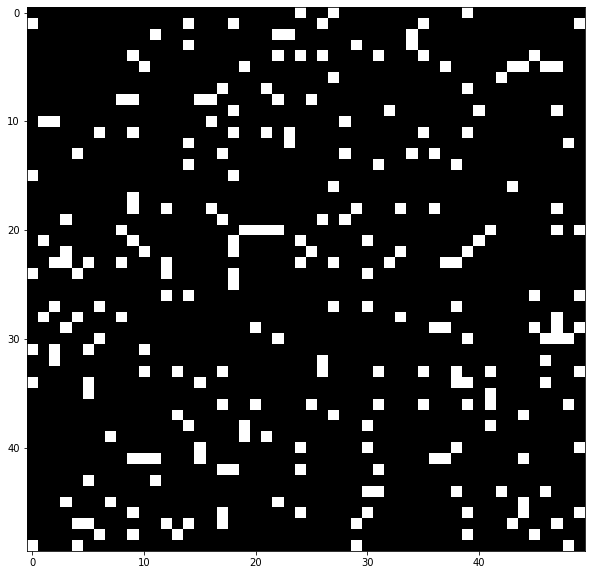

In [14]:
import copy
grid=grid_class(50,50,0.9)
figure(figsize=(10,10))
imshow(grid.data, aspect='auto', cmap=bone(), interpolation='none')

!rm -rf *.png
!rm -rf *.gif

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


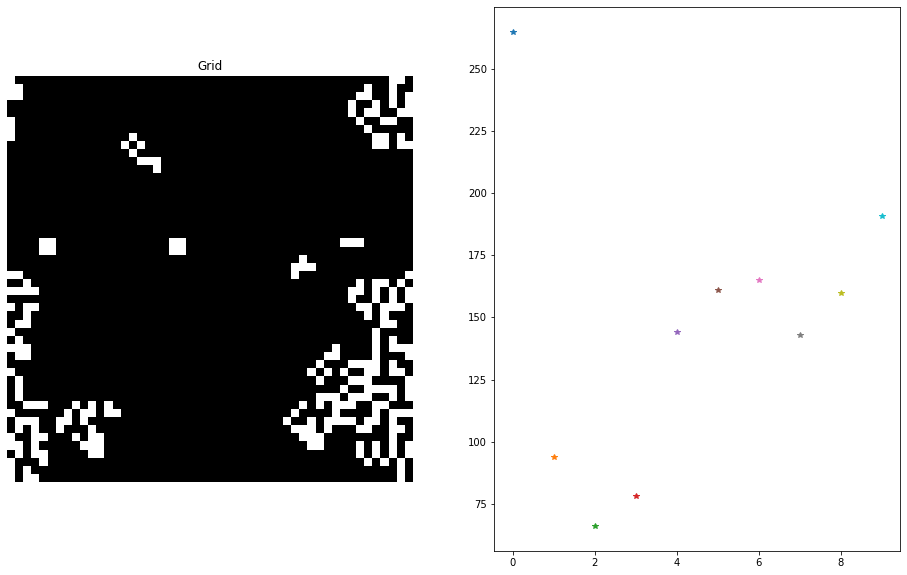

In [15]:
nofit=10

fig=figure(figsize=(16,10))

for n in arange(nofit):
    bef=copy.deepcopy(grid.data)
    change_count=grid.one_time_step()    
    
    ax2=subplot(121)
    ax2.imshow(grid.data, interpolation='none', cmap=bone())
    ax2.axis('off')
    ax2.set_title('Grid')
    
    ax5=subplot(122)
    ax5=plot(n, change_count, '*')
    
    filename = 'grid_%04d.png' % n 
    savefig(filename, dpi=50)
      
    if (array_equal(bef, grid.data)==True):
        break

In [18]:
# create a movie somehow
# this is probably not the best way ;)

from PIL import Image
import glob

# Create the frames
frames = []
imgs = sorted(glob.glob("*.png"))
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('movie.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)